In this notebook I will read the txt file disseminated data output from EK80 333 kHz

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import array as arr
import datetime

In [2]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Echosounder data
Output from EK80 :
    These are not the raw data, but the averages of the backscatter signal over the duration of each EK80 sample (which here lasts 10 min). The averages are presented for 20 depth layers (columns WBT_L00 to WBT_L019), each layer corresponds to 1/20th of the max depth in the EK80 settings (in this case 200m, so 10m per layer

In [3]:
data = pd.read_table('./SB2018D.txt' )


In [4]:
data

,Time,Lat,Long,TTFF,Count,Commands,TxTries,ONT,DiskUsed,Files,...,WBT_L11,WBT_L12,WBT_L13,WBT_L14,WBT_L15,WBT_L16,WBT_L17,WBT_L18,WBT_L19,Unnamed: 40
0,2021-02-22 12:15:41,60.34152,5.35554,11,0,0,0,10,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-22 12:18:00,60.34155,5.35554,11,1,0,1,10,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-22 12:20:00,60.34155,5.35551,11,2,1,1,100,0,0,...,-64.0,-64.0,-64.0,-64.0,-58.0,-58.0,-58.0,-58.0,-58.0,NaN
3,2021-02-22 12:24:00,60.34152,5.35554,12,3,0,2,100,0,0,...,-64.0,-64.0,-64.0,-64.0,-58.0,-58.0,-58.0,-58.0,-58.0,NaN
4,2021-02-22 12:30:00,60.34155,5.35554,11,4,1,1,100,0,0,...,-64.0,-64.0,-64.0,-64.0,-58.0,-58.0,-58.0,-58.0,-58.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,2021-04-15 05:45:00,56.51487,3.15504,14,4,0,1,640,0,0,...,-64.0,-64.0,NaN,-52.0,-70.0,-76.0,-76.0,-76.0,-70.0,NaN
2228,2021-04-15 06:45:00,56.51568,3.14157,12,8,0,1,640,0,0,...,-70.0,-70.0,NaN,-58.0,-70.0,-76.0,-76.0,-76.0,-70.0,NaN
2229,2021-04-15 07:45:00,56.51835,3.13953,12,12,0,1,640,0,0,...,-64.0,-64.0,NaN,-58.0,-70.0,-76.0,-76.0,-76.0,-70.0,NaN
2230,2021-04-15 08:45:00,56.51967,3.14328,41,16,0,1,660,0,0,...,-64.0,-64.0,NaN,-58.0,-70.0,-76.0,-76.0,-76.0,-70.0,NaN


In [5]:
depths = np.linspace(0,200,21)

In [6]:
sv = data.iloc[:,20:]

In [7]:
times = np.array([])
ntimes = len(data.index)
for ind in range(0,ntimes):
    times = np.append(times, datetime.datetime.strptime('%s' %(data['Time'][ind]), '%Y-%m-%d %H:%M:%S'))


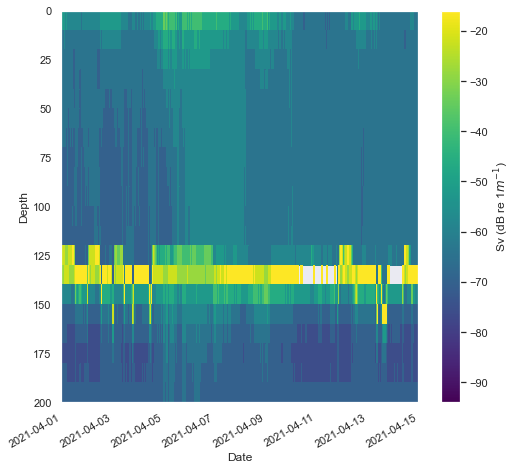

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
c=ax.pcolor(times, depths, sv.T, cmap='viridis')
ax.invert_yaxis()
fig.autofmt_xdate()
plt.xlim([datetime.date(2021,4,1), datetime.date(2021,4,15)])
cbar = fig.colorbar(c)
plt.xlabel('Date')
plt.ylabel('Depth')
cbar.ax.set_ylabel('Sv (dB re 1$m^{-1}$)');